# Exploratory Analysis of OpenImage Data
What images have I downloaded, what classes do they represent, etc etc

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

data_path = "/run/media/kevin/Volume/OpenImages/"

In [3]:
# get file names
files = os.listdir(os.path.join(data_path, "pics"))
print(f"{len(files)} images downloaded")
image_ids = [x.replace(".jpg", "") for x in files]

# load class descriptions
# load class descriptions
cls = pd.read_csv(os.path.join(data_path, "class-descriptions-boxable.csv"), header=None, index_col=0)


# load image labels
labs = pd.read_csv(os.path.join(data_path, "train-annotations-human-imagelabels-boxable.csv"))
labs.head()

796158 images downloaded


,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,verification,/m/014j1m,0
1,000002b66c9c498e,verification,/m/014sv8,1
2,000002b66c9c498e,verification,/m/01599,0
3,000002b66c9c498e,verification,/m/015p6,0
4,000002b66c9c498e,verification,/m/015x4r,0


In [4]:
# filter labels for available pics
labs = labs[labs['ImageID'].isin(image_ids)]
print(len(set(labs['ImageID'])))

796158


In [5]:
np.median(labs['LabelName'].value_counts())

914.0

## Images
Look at some of the images

001330501fce65ab
0
/m/01rzcn    Watercraft
/m/01btn          Barge
/m/07jdr          Train
/m/083wq          Wheel
/m/04rky         Mammal
/m/0jbk          Animal
/m/01lrl      Carnivore
/m/07yv9        Vehicle
/m/0bt9lr           Dog
/m/019jd           Boat
Name: 1, dtype: object


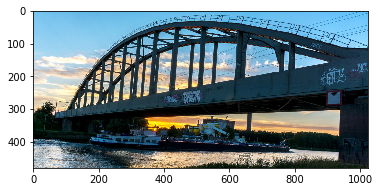

In [6]:
idx = 2193
img_id = image_ids[idx]
print(img_id)
# load and show image
im = Image.open(os.path.join(data_path,"pics",files[idx]))
plt.imshow(im)


# get labels
tmp = labs.loc[[x == img_id for x in list(labs['ImageID'])]]
#tmp = tmp[tmp['Confidence'] == 1]
tmp_labels = list(set(tmp['LabelName']))
print(cls.loc[tmp_labels,:].iloc[:,0])